### Beer Consumption - Sao Paulo

The dataset, available at https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo, contains data that were collected """ were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average)."""


The following activities will be conducted:

1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
2. Brief description of the data set you chose and a summary of its attributes.
3. Brief summary of data exploration and actions taken for data cleaning and feature engineering.
4. Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
5. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


## 1. Main objective

The main objective of the analysis will be to see which variables have a greater impact on beer consumption. Do people drink more when the temperature is higher? Or when the price is lower?


## 2. Dataset description

The dataset, available at https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo, contains the following variables:


    Data = Date
    Temperatura Media = Average temperature
    Temperatura Minima = Minimum temperature
    Temperatura Maxima = Maximum temperature
    Precipitacao = Precipitation
    Final de Semana = Weekend
    Consumo de cerveja = Beer consumption


## 3. Data exploration

In [1]:
# Import python packages to be used
# %pylab inline
# %config InlineBackend.figure_formats = ['svg']
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/Consumo_cerveja.csv')
dataset

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us first translate the column names to English.

In [3]:
portuguese_columns = [ 'Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
                       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
                       'Consumo de cerveja (litros)']
columns = ['Date', 'Avg temp (C)', 'Min temp (C)', 
               'Max temp (C)', 'Precipitation (mm)', 'Weekend',
                'Beer consumption (liters)']

for p, e in zip (portuguese_columns, columns):
    dataset[e] = dataset[p]
    dataset = dataset.drop([p], axis = 1)

dataset

,Date,Avg temp (C),Min temp (C),Max temp (C),Precipitation (mm),Weekend,Beer consumption (liters)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us count the na values.

In [4]:
for c in columns:
    if dataset[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, dataset[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

Date: 576 invalid values found
Avg temp (C): 576 invalid values found
Min temp (C): 576 invalid values found
Max temp (C): 576 invalid values found
Precipitation (mm): 576 invalid values found
Weekend: 576 invalid values found
Beer consumption (liters): 576 invalid values found


There are 576 empty rows that we should delete at once. 365 rows will remain.

In [5]:
dataset = dataset.dropna()
dataset

,Date,Avg temp (C),Min temp (C),Max temp (C),Precipitation (mm),Weekend,Beer consumption (liters)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


Let's now look for any unusual values (for example freezing or boiling temperatures). We will also need to change temperatures and precipitation to floats, as the decimal comma makes it clear that these values have been stored as text.

In [6]:
import re

for col in ['Avg temp (C)', 'Min temp (C)', 'Max temp (C)', 'Precipitation (mm)']:
    dataset[col] = pd.to_numeric(dataset[col].apply(lambda x: re.sub(',', '.', str(x))))

dataset.describe()

<ipython-input-6-acffe1aed536>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = pd.to_numeric(dataset[col].apply(lambda x: re.sub(',', '.', str(x))))


,Avg temp (C),Min temp (C),Max temp (C),Precipitation (mm),Weekend,Beer consumption (liters)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


The temperatures make sense. Let us check if the amount of weekend days makes sense. 

In [7]:
weekends = dataset['Weekend'].tolist()
print('There are {0} weekend days in the dataset and there are approximately {1} weekend days per year'.format(sum(weekends), (365*2/7)))

There are 104.0 weekend days in the dataset and there are approximately 104.28571428571429 weekend days per year


Now let us chart the different variables.

In [8]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
    
def plot_series (df, cols, sortby='Date', title='', mode='all'):
    """
    Using plotly
    """
    x, series = df[sortby], list()
    for c in cols:
        series.append(go.Scatter(x=x, y=df[c], name = c, opacity = 0.4))
    layout = dict(title=title)
    fig = dict(data=series, layout=layout)
    # force legend if only one column
    if len(cols) == 1:
        fig['data'][0]['showlegend']=True
        fig['data'][0]['name']=cols[0]
    iplot(fig)

variables = [['Precipitation (mm)'], ['Avg temp (C)', 'Min temp (C)', 'Max temp (C)'], ['Beer consumption (liters)']]
for v in variables: plot_series(dataset, v)

There seems to be some stationality in the data, but this could depend on the temperatures as well. Let's build histograms for these variables.

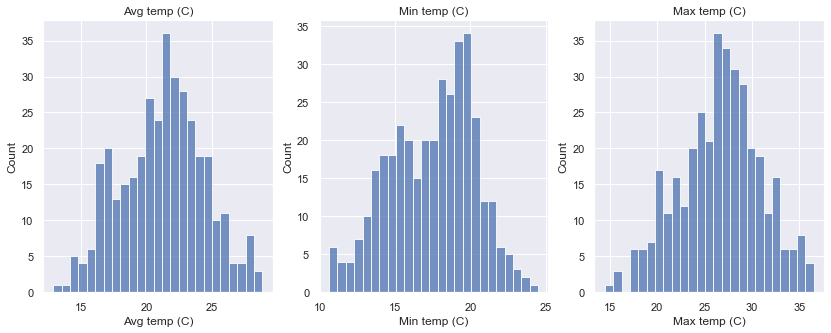

In [9]:
sns.set(style='darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(14,5))
for name, ax in zip(['Avg temp (C)', 'Min temp (C)', 'Max temp (C)'], [ax1, ax2, ax3]):
    g = sns.histplot(dataset, x=name, bins=25, ax=ax).set(title=name)

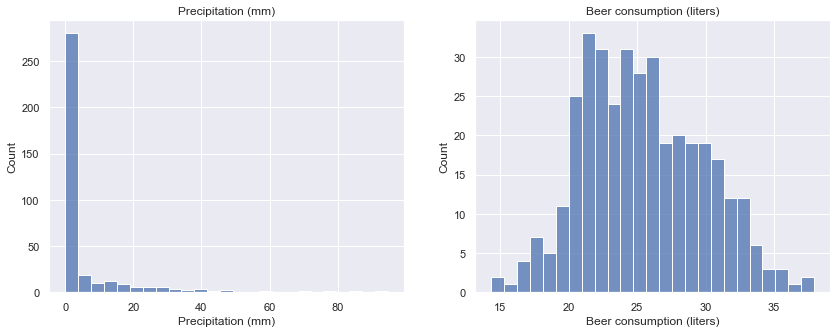

In [10]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,5))
for name, ax in zip(['Precipitation (mm)', 'Beer consumption (liters)'], [ax1, ax2]):
    g = sns.histplot(dataset, x=name, bins=25, ax=ax).set(title=name)

While the temperatures and beer consumption have a bell-like shape, the precipitation does not. Most days have 0 or very low precipitation, so a transformation might be considered. Because of the abundant zeroes, logarithmic and Box-Cox plots are not feasible. Since there are so many zeroes, even a Yeo-Johnson or a log1p transformation will leave us with a large spike anyway, so no transformation will be conducted (see what would hapen below).

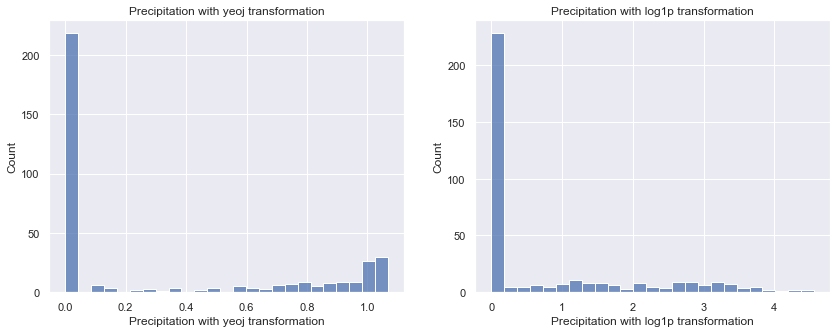

In [11]:
from scipy.stats import yeojohnson

yeoj, lam = yeojohnson(dataset['Precipitation (mm)'])
dataset_tr = dataset.copy()
dataset_tr['Precipitation with yeoj transformation'] = yeoj
dataset_tr['Precipitation with log1p transformation'] = dataset_tr['Precipitation (mm)'].apply(np.log1p)

sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,5))
for name, ax in zip(['Precipitation with yeoj transformation', 'Precipitation with log1p transformation'], [ax1, ax2]):
    g = sns.histplot(dataset_tr, x=name, bins=25, ax=ax).set(title=name)

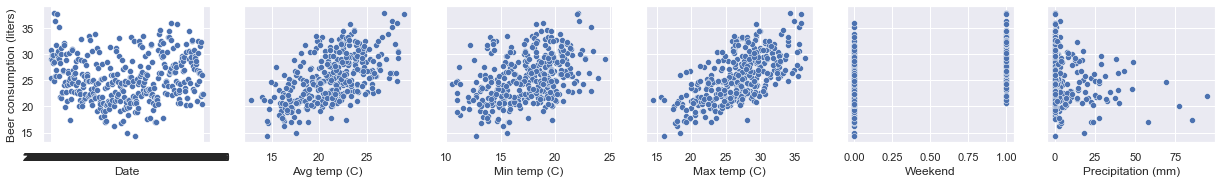

In [12]:
x_vars = ['Date', 'Avg temp (C)', 'Min temp (C)', 'Max temp (C)', 'Weekend', 'Precipitation (mm)' ]
fig, axs = plt.subplots(1,len(x_vars), figsize=(3*len(dataset.columns),2.5), sharey=True)

for i, col_name in enumerate(x_vars):
    sns.scatterplot(data=dataset, x=col_name, y='Beer consumption (liters)', ax=axs[i])

There may be some positive correlation between beer consumption, the temperatures, and whether the day is a weekend. It is also possible that consumption decreases when the precipitation is high. There is probably no correlation with our date, so it will be excluded from our regression models.

### Summary of data exploration and actions taken for data cleaning and feature engineering

1. Invalid values were dropped.
2. After visually comparing the beer consumption and the temperature chart, it would seem plausible that people do drink more beer when the temperatures are higher. 
3. It would also be intuitively believable that people drink more on weekends and less when it is raining, because both will regulate the number of people outside their homes or workplaces.
4. It is hypothetized that there may be some correlation between our x variables and beer consumption.
5. No transformation was carried out. There is also no one-hot encoding because there are no categorical variables (except for 'Weekend', which was at the start).

## 4. Linear regression models

We will now use several regression models.

### 4.1. Simple linear regression

In [13]:
df_proc = dataset.copy().drop(['Date'], axis=1) # Remove dates
df_proc

,Avg temp (C),Min temp (C),Max temp (C),Precipitation (mm),Weekend,Beer consumption (liters)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [14]:
from sklearn.model_selection import train_test_split

y_col = 'Beer consumption (liters)'

# Split the data
feature_cols = [x for x in df_proc.columns if x != y_col]
X = df_proc[feature_cols]
y = df_proc[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will now apply a simple 'vanilla' linear regression model on both datasets and assemble a table to see which one has a larger error.


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='vanilla error'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,vanilla error
train,5.287330
test,5.589532


In [16]:
from sklearn.metrics import r2_score, mean_squared_error

# Storage for r2 values
r2_df = list()

score_vanilla_train = r2_score(y_train.values, y_train_pred)
score_vanilla_test  = r2_score(y_test.values, y_test_pred)


r2_df.append(pd.Series({'train': score_vanilla_train,
                           'test' : score_vanilla_test},
                          name='vanilla r^2'))

# Assemble the results
r2_df = pd.concat(r2_df, axis=1)
r2_df

,vanilla r^2
train,0.706380
test,0.743742


Using our vanilla linear regression, the r^2 coefficient is better in the test set than in the train set. 


### 4.2. Linear Regression with cross-validation
For added certainty, we will use cross-validation.

In [17]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

kf = KFold(shuffle=True, random_state=72018, n_splits=3)
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  8 10 11 12 13 14] 243
Test index: [ 0  2  6  7  9 19 25 26 29 32] 122

Train index: [ 0  2  6  7  9 10 11 12 13 18] 243
Test index: [ 1  3  4  5  8 14 15 16 17 22] 122

Train index: [0 1 2 3 4 5 6 7 8 9] 244
Test index: [10 11 12 13 18 20 21 24 28 31] 121



In [18]:
scores = []
lr = LinearRegression()
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y.iloc[train_index], 
                                        y.iloc[test_index])
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    score = r2_score(y_test, y_pred)
    
    scores.append(score)

scores

[0.7629623487765229, 0.6428871948776538, 0.6905434955693883]

We get different r^2 values. If we were to add a subsequent year to the data, it would have been wiser to have validated our model with cross-validation. As we can see, there is a significative variability in r^2.

### 4.3. Lasso and Ridge regression

We will now test whether it is possible to obtain better results by using the Lasso and Ridge regression.

In [19]:
alphas_lasso = np.geomspace(1e-9, 1e0, num=10)
alphas_lasso

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [20]:
from sklearn.linear_model import Lasso, Ridge

scores_df = list()
models_dict = dict()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

for alpha in alphas_lasso:
    # 1. Lasso transformation
    las = Lasso(alpha=alpha, max_iter=1000000)
    # Fitting model to training set
    las.fit(X_train, y_train)
    # Finding prediction on test set
    y_pred_las = las.predict(X_test)
    # Calculating r2 score
    r2_lasso = r2_score(y_test, y_pred_las)

    # 2. Ridge transformation
    r = Ridge(alpha = alpha)
    # Fitting model to training set
    r.fit(X_train, y_train)
    # Finding prediction on test set
    y_pred_r = r.predict(X_test)
    # Calculating r2 score
    r2_ridge = r2_score(y_test, y_pred_r)

    # 3. Using vanilla Linear Regression
    lr = LinearRegression()
    # Fitting model to training set
    lr.fit(X_train, y_train)
    # predicting on test set
    y_pred_lr = lr.predict(X_test)
    # Calculating r2 score
    r2_linear = r2_score(y_test, y_pred_lr)


    # 4. Coefficients
    # Magnitude of Lasso coefficients
    lasso_coef_mag = abs(las.coef_).sum()
    # Number of coefficients not equal to 0 for Lasso
    lasso_coef_pos_qt = (las.coef_!=0).sum()

    # Magnitude of Ridge coefficients
    ridge_coef_mag = np.sum(np.abs(r.coef_))
    # Number of coefficients not equal to 0 for Ridge
    ridge_coef_pos_qt = np.sum(r.coef_ != 0)
    
    # Magnitude of Linear Regression coefficients
    lr_coef_mag = abs(lr.coef_).sum()
    # Number of coefficients not equal to 0 for Linear Regression
    lr_coef_pos_qt = (lr.coef_!=0).sum()

    # Assemble
    scores_df.append(pd.Series({'r2_lasso': r2_lasso,
                                'r2_ridge' : r2_ridge,
                                'r2_linear' : r2_linear,
                                'lasso_coef_mag' : lasso_coef_mag,
                                'lasso_coef_pos_qt' : lasso_coef_pos_qt,
                                'ridge_coef_mag' : ridge_coef_mag,
                                'ridge_coef_pos_qt' : ridge_coef_pos_qt,
                                'lr_coef_mag' : lr_coef_mag,
                                'lr_coef_pos_qt' : lr_coef_pos_qt},
                                  name='alpha = '+str(alpha)))
    
    models_dict[alpha]        = {'lasso' : las, 'las_coef_':las.coef_, 'y_pred' : y_pred_las,
                                 'ridge' : r, 'r_coef_':r.coef_, 'y_pred' : y_pred_r,
                                 'lr' : lr, 'lr_coef_':lr.coef_, 'y_pred' : y_pred_lr,
                                }
    
scores_df = pd.concat(scores_df, axis=1)    
scores_df

,alpha = 1e-09,alpha = 1e-08,alpha = 1e-07,alpha = 1e-06,alpha = 1e-05,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1.0
r2_lasso,0.752541,0.752541,0.752541,0.752541,0.752541,0.752540,0.752531,0.752425,0.748066,0.479742
r2_ridge,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752534,0.752469,0.751746
r2_linear,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541,0.752541
lasso_coef_mag,5.925354,5.925354,5.925353,5.925347,5.925281,5.924625,5.918056,5.852067,5.352437,0.852873
lasso_coef_pos_qt,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
ridge_coef_mag,5.925354,5.925354,5.925354,5.925354,5.925353,5.925345,5.925260,5.924414,5.915971,5.833057
ridge_coef_pos_qt,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
lr_coef_mag,5.925354,5.925354,5.925354,5.925354,5.925354,5.925354,5.925354,5.925354,5.925354,5.925354
lr_coef_pos_qt,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
# Let's see the coefficients
for name, model in zip (['linear regression', 'lasso', 'ridge'], [lr, las, r]):
    coefs = model.coef_.tolist()
    print('{0} coefficients: {1}'.format(name, coefs))

linear regression coefficients: [0.2049963396193268, -0.039891184612988184, 0.525499570833217, -0.056852234221907647, 5.098114700916136]
lasso coefficients: [0.0, 0.0, 0.5764245478235513, -0.04162356256358538, 0.2348248719507096]
ridge coefficients: [0.2078213457335984, -0.04174973064488591, 0.5238735018243019, -0.05669205013771373, 5.002920082543754]


As of now, there is no significant advantage to using lasso or ridge over simple linear regression, with very similar r^2 scores. However, the lasso coefficients for average and minimum temperatures are zero and using lasso we can have a model with fewer inputs. This makes sense because it is very likely that the three temperature columns are not entirely independent from each other. 

We could attempt to use polynomial features. However, to reduce processing time, we will only leave the maximum temperature.

In [22]:
coefficients_df = pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients":las.coef_})
coefficients_df

,Feature,Coefficients
0,Avg temp (C),0.000000
1,Min temp (C),0.000000
2,Max temp (C),0.576425
3,Precipitation (mm),-0.041624
4,Weekend,0.234825


## 4.4. Polynomial features

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4, include_bias=False,)

feature_cols = ['Max temp (C)', 'Weekend', 'Precipitation (mm)' ]
X_simple = df_proc[feature_cols]
X_pf = pf.fit_transform(X_simple)
# We now have 365 rows and 34 columns
X_pf.shape

(365, 34)

In [24]:
scores_df = list()
models_dict = dict()

X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

# We will do the same as before, 
# but with the alpha that got best results for our three linear regression models.
for alpha in [0.0001,]:
    print('Using alpha:', alpha)
    # 1. Lasso transformation
    las_pf = Lasso(alpha=alpha, max_iter=10000000)
    # Fitting model to training set
    las_pf.fit(X_train_pf, y_train_pf)
    # Finding prediction on test set
    y_pred_las_pf = las_pf.predict(X_test_pf)
    # Calculating r2 score
    r2_lasso_pf = r2_score(y_test_pf, y_pred_las_pf)

    # 2. Ridge transformation
    r_pf = Ridge(alpha = alpha)
    # Fitting model to training set
    r_pf.fit(X_train_pf, y_train_pf)
    # Finding prediction on test set
    y_pred_r_pf = r_pf.predict(X_test_pf)
    # Calculating r2 score
    r2_ridge_pf = r2_score(y_test_pf, y_pred_r_pf)

    # 3. Using vanilla Linear Regression
    lr_pf = LinearRegression()
    # Fitting model to training set
    lr_pf.fit(X_train_pf, y_train_pf)
    # predicting on test set
    y_pred_lr_pf = lr_pf.predict(X_test_pf)
    # Calculating r2 score
    r2_linear_pf = r2_score(y_test_pf, y_pred_lr_pf)


    # 4. Coefficients
    # Magnitude of Lasso coefficients
    lasso_coef_mag_pf = abs(las_pf.coef_).sum()
    # Number of coefficients not equal to 0 for Lasso
    lasso_coef_pos_qt_pf = (las_pf.coef_!=0).sum()

    # Magnitude of Ridge coefficients
    ridge_coef_mag_pf = np.sum(np.abs(r_pf.coef_))
    # Number of coefficients not equal to 0 for Ridge
    ridge_coef_pos_qt_pf = np.sum(r_pf.coef_ != 0)
    
    # Magnitude of Linear Regression coefficients
    lr_coef_mag_pf = abs(lr_pf.coef_).sum()
    # Number of coefficients not equal to 0 for Linear Regression
    lr_coef_pos_qt_pf = (lr_pf.coef_!=0).sum()

    # Assemble
    scores_df.append(pd.Series({'r2_lasso': r2_lasso_pf,
                                'r2_ridge' : r2_ridge_pf,
                                'r2_linear' : r2_linear_pf,
                                'lasso_coef_mag' : lasso_coef_mag_pf,
                                'lasso_coef_pos_qt' : lasso_coef_pos_qt_pf,
                                'ridge_coef_mag' : ridge_coef_mag_pf,
                                'ridge_coef_pos_qt' : ridge_coef_pos_qt_pf,
                                'lr_coef_mag' : lr_coef_mag_pf,
                                'lr_coef_pos_qt' : lr_coef_pos_qt_pf},
                                  name='alpha = '+str(alpha)))
    
    models_dict[alpha]        = {'lasso' : las_pf, 'las_coef_':las_pf.coef_, 'y_pred' : y_pred_las_pf,
                                 'ridge' : r_pf, 'r_coef_':r_pf.coef_, 'y_pred' : y_pred_r_pf,
                                 'lr' : lr_pf, 'lr_coef_':lr_pf.coef_, 'y_pred' : y_pred_lr_pf,
                                }
    
scores_df = pd.concat(scores_df, axis=1)    
scores_df

Using alpha: 0.0001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.2957412453881, tolerance: 0.4910028853584314

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=4.6152e-21): result may not be accurate.



,alpha = 0.0001
r2_lasso,0.727329
r2_ridge,0.726196
r2_linear,0.726176
lasso_coef_mag,6.560587
lasso_coef_pos_qt,32.000000
ridge_coef_mag,24.779554
ridge_coef_pos_qt,34.000000
lr_coef_mag,25.044127
lr_coef_pos_qt,34.000000


## 5. Conclusions and findings

1. The recommended regression is the Lasso regression without polynomial features, that offered the highest r^2 value, while reducing the coefficients and thus the variables needed to explain our model. Adding polynomial features did not improve our results while increasing complexity and computation time. The chosen model is as follows:

In [25]:
coefficients_df

,Feature,Coefficients
0,Avg temp (C),0.000000
1,Min temp (C),0.000000
2,Max temp (C),0.576425
3,Precipitation (mm),-0.041624
4,Weekend,0.234825


2. Beer consumption is positively correlated with temperature and the day being a weekend. It is negatively correlated with precipitation.

3. It may be possible to do a better prediction if adding the date after processing it for stationality, i.e. adding months and weekdays (possibly as categorical variables).